# Task 1: TITANIC SURVIVAL PREDICTION

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# 1. Read the dataset and perform basic data quality checks

In [3]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

#### Missing values will be taken care by imputation in the following steps

In [6]:
df.duplicated().sum()

0

# 2. Separate Dependent (X) and Independent (Y) features

In [9]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Survived']) # dropping statistically insignificant features and Independent feature
Y = df[['Survived']]


In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Plotting Bar Chart for Y feature

In [12]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

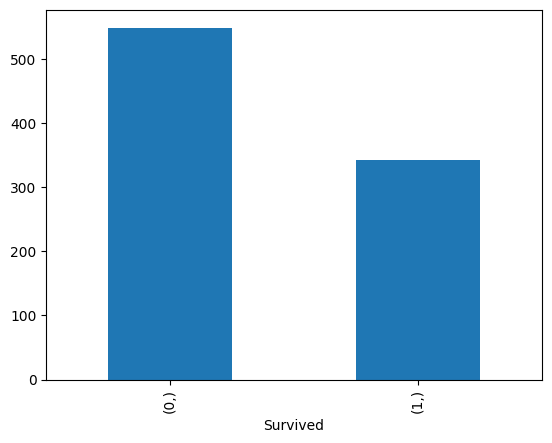

In [13]:
Y.value_counts().plot(kind='bar')

# 3. Data pre-processing for X

### Separate categorical and continuous features for X

In [15]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [16]:
cat

['Sex', 'Embarked']

In [17]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Creating Pipelines for imputation and transforming X data

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
# numerical pipeline using Simple Imputer with Median and Standard Scaler
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [23]:
# categorial piplene using Simple Imputer with Mode and One Hot Encoder
cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [21]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [22]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


# 4. Apply Train-Test Split on X_pre and Y

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [26]:
xtrain.shape

(712, 10)

In [27]:
xtest.shape

(179, 10)

In [25]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [28]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [29]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [30]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


# 5. Model Building Using Ensemble Techniques - Random Forest and Gradient Boosting

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [32]:
# Accuracy in train data
model1.score(xtrain, ytrain)

0.6657303370786517

In [33]:
# Accuracy in test data
model1.score(xtest, ytest)

0.6759776536312849

#### Before hyperparameter tuning score of:

1. Train data = 66.573
2. Test data = 67.598

#### Hyperparameter Tuning Random Forest parameters

In [38]:
params1 = {'n_estimators':[10, 50, 100, 200],
           'max_depth':[2, 3, 4, 5],
           'min_samples_split':[5, 6, 7, 8],
           'criterion':['gini', 'entropy']}

In [39]:
# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [40]:
rscv1.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'max_depth': 5,
 'criterion': 'gini'}

In [41]:
rscv1.best_score_

0.8043824038923644

In [42]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_split=8)

In [43]:
best_rfc.score(xtrain, ytrain)

0.8609550561797753

In [44]:
best_rfc.score(xtest, ytest)

0.8156424581005587

#### After hyperparameter tuning score of:

1. Train data = 86.095
2. Test data = 81.564

#### The scores ahve improved significantly after parameter tuning

### Predict results for Random Forest

In [45]:
ypred_train1 = best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

#### Comparing Actual and Predicted Train data for Target feature --> most of the times the predictions will match with actual data 

In [46]:
ypred_train1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [47]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


#### Similarly comparing Actual and Predicted Test data for Target feature --> most of the times the predictions will match with actual data 

In [48]:
ypred_test1[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [49]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Plotting Confusion Matrix for Random Forest for Y test data (actual vs predicted)

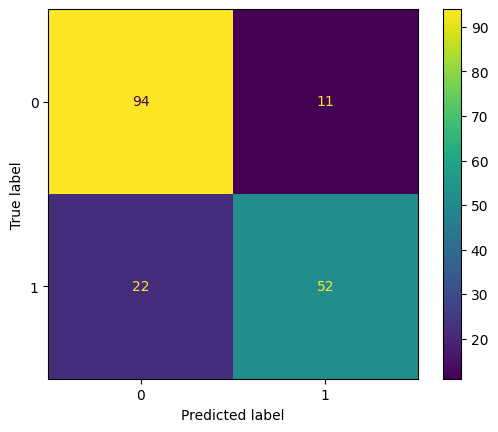

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf1 = confusion_matrix(ytest, ypred_test1)
cfd1 = ConfusionMatrixDisplay(cf1, display_labels=best_rfc.classes_)
cfd1.plot()

### Print Classification Report for Random Forest

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

